In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from catboost import CatBoostClassifier

In [47]:
df = pd.read_csv('data/train.csv')
df.drop(columns='id', inplace=True)
df.head(5)

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [48]:
df.isnull().sum()

keyword       61
location    2533
text           0
target         0
dtype: int64

In [49]:
df.fillna('', inplace=True)

df.isnull().sum()

keyword     0
location    0
text        0
target      0
dtype: int64

In [50]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [51]:
df['keyword'].value_counts()

                         61
fatalities               45
deluge                   42
armageddon               42
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 222, dtype: int64

In [52]:
df['location'].value_counts()

                                2533
USA                              104
New York                          71
United States                     50
London                            45
                                ... 
Surulere Lagos,Home Of Swagg       1
MontrÌ©al, QuÌ©bec                 1
Montreal                           1
ÌÏT: 6.4682,3.18287                1
Lincoln                            1
Name: location, Length: 3342, dtype: int64

In [53]:
popular_keywords = df['keyword'].value_counts().head(10)
popular_keywords

               61
fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
evacuate       40
fear           40
Name: keyword, dtype: int64

Text(0.5, 1.0, 'Столбчатая диаграмма ключевых слов и значений целевой переменной')

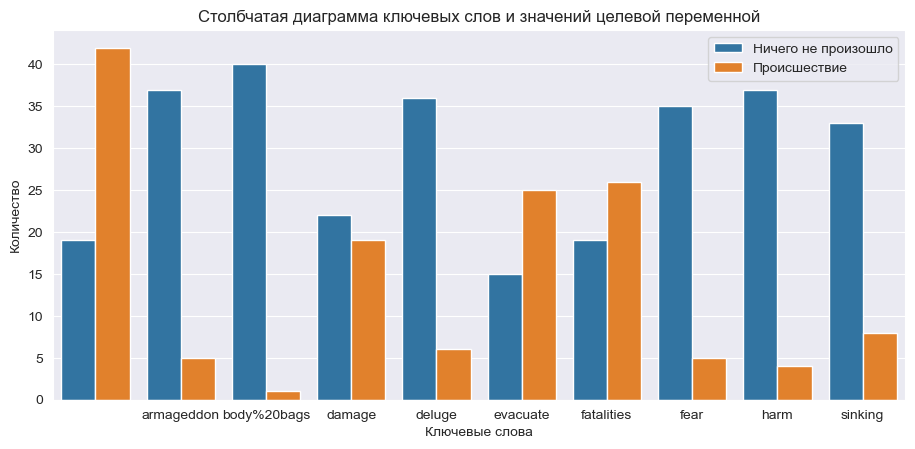

In [54]:
g = sns.countplot(data=df[df['keyword'].isin(popular_keywords.index.values)], x='keyword', hue='target')
g.figure.set_figwidth(11)

plt.xlabel('Ключевые слова')
plt.ylabel('Количество')
plt.legend(['Ничего не произошло', 'Происшествие'])
plt.title('Столбчатая диаграмма ключевых слов и значений целевой переменной')

In [55]:
X = df.drop(columns='target')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
vec = CountVectorizer(tokenizer=TweetTokenizer().tokenize)
X_train_vec = vec.fit_transform(X_train['text'])
X_test_vec = vec.transform(X_test['text'])

X_train_vec.shape

C:\Users\Andrei\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(5329, 18080)

In [94]:
model = CatBoostClassifier(iterations=1000, task_type='CPU', random_state=42)
model.fit(X_train_vec, y_train, cat_features=None, eval_set=(X_test_vec, y_test))

Learning rate set to 0.047906
0:	learn: 0.6865617	test: 0.6869752	best: 0.6869752 (0)	total: 47.7ms	remaining: 47.7s
1:	learn: 0.6809418	test: 0.6819919	best: 0.6819919 (1)	total: 103ms	remaining: 51.5s
2:	learn: 0.6745445	test: 0.6764081	best: 0.6764081 (2)	total: 142ms	remaining: 47.3s
3:	learn: 0.6689302	test: 0.6712685	best: 0.6712685 (3)	total: 173ms	remaining: 43.1s
4:	learn: 0.6644724	test: 0.6672105	best: 0.6672105 (4)	total: 204ms	remaining: 40.5s
5:	learn: 0.6601718	test: 0.6635005	best: 0.6635005 (5)	total: 234ms	remaining: 38.7s
6:	learn: 0.6560612	test: 0.6597635	best: 0.6597635 (6)	total: 264ms	remaining: 37.5s
7:	learn: 0.6521939	test: 0.6559660	best: 0.6559660 (7)	total: 294ms	remaining: 36.5s
8:	learn: 0.6485143	test: 0.6528202	best: 0.6528202 (8)	total: 323ms	remaining: 35.6s
9:	learn: 0.6454547	test: 0.6500417	best: 0.6500417 (9)	total: 353ms	remaining: 34.9s
10:	learn: 0.6420300	test: 0.6468347	best: 0.6468347 (10)	total: 383ms	remaining: 34.5s
11:	learn: 0.6394388	

In [84]:
accuracy_score(y_test, model.predict(X_test_vec))

0.7802101576182137

In [90]:
df_test = pd.read_csv('data/test.csv')
df_test['target'] = model.predict(vec.transform(df_test['text']))
df_test.head(15)

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1
5,12,NaN,NaN,We're shaking...It's an earthquake,1
6,21,NaN,NaN,They'd probably still show more life than Arse...,0
7,22,NaN,NaN,Hey! How are you?,0
8,27,NaN,NaN,What a nice hat?,0
9,29,NaN,NaN,Fuck off!,0


In [86]:
df_test.shape

(3263, 5)

In [91]:
df_test.drop(columns=['keyword', 'location', 'text'], inplace=True)

In [92]:
df_test.to_csv('predictions.csv', index=False)